In [1]:
import numpy as np
import PIL
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin = dataset_url, cache_dir=".",untar=True)

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

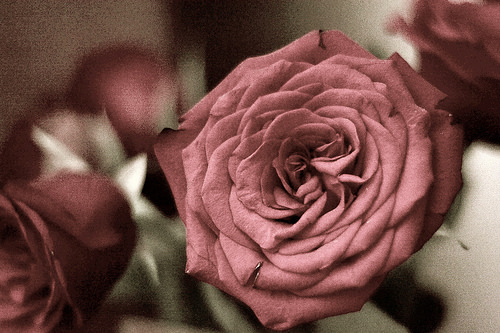

In [8]:
 PIL.Image.open(str(roses[12]))

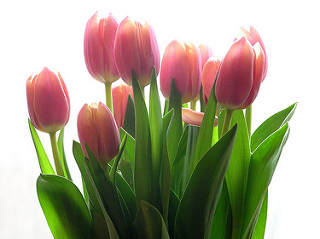

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[12]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [11]:
flowers_images_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [13]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [16]:
img.shape

(240, 179, 3)

In [17]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [18]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [19]:
X = np.array(X)
y = np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state = 10)

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [22]:
X_train[0]

array([[[  2,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 48,  78,  87],
        [ 44,  65,  74],
        [ 38,  57,  69]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  0,   0,   0],
        ...,
        [ 40,  80,  96],
        [ 37,  73,  80],
        [ 25,  65,  59]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  0,   0,   0],
        ...,
        [ 46,  83,  86],
        [ 37,  73,  80],
        [ 34,  69,  65]],

       ...,

       [[170, 184, 207],
        [169, 185, 209],
        [172, 190, 203],
        ...,
        [100, 113, 137],
        [100, 115, 127],
        [ 95, 108, 124]],

       [[162, 188, 220],
        [169, 189, 221],
        [170, 188, 211],
        ...,
        [110, 126, 140],
        [104, 119, 141],
        [105, 120, 136]],

       [[160, 192, 236],
        [170, 192, 234],
        [173, 194, 226],
        ...,
        [126, 138, 154],
        [126, 131, 143],
        [123, 127, 139]]

In [23]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer= 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 243ms/step - accuracy: 0.3061 - loss: 1.6470
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 240ms/step - accuracy: 0.5789 - loss: 1.0782
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 236ms/step - accuracy: 0.6537 - loss: 0.9115
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 231ms/step - accuracy: 0.7394 - loss: 0.6914
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 231ms/step - accuracy: 0.8204 - loss: 0.5105
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - accuracy: 0.9049 - loss: 0.3034
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 231ms/step - accuracy: 0.9380 - loss: 0.1933
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 230ms/step - accuracy: 0.9683 - loss: 0.1115
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 231ms/step - accuracy: 0.9784 - loss: 0.0770
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 230ms/step - accuracy: 0.9948 - loss: 0.0399


In [24]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5950 - loss: 1.9345


[1.9879473447799683, 0.5980392098426819]

In [25]:
data_augmentation = keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [26]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.15),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer= 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 338ms/step - accuracy: 0.3651 - loss: 1.5043
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 324ms/step - accuracy: 0.5614 - loss: 1.0602
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 318ms/step - accuracy: 0.6211 - loss: 0.9760
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 320ms/step - accuracy: 0.6520 - loss: 0.9022
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 316ms/step - accuracy: 0.6721 - loss: 0.8469
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 308ms/step - accuracy: 0.7086 - loss: 0.7652
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 320ms/step - accuracy: 0.7120 - loss: 0.7344
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 314ms/step - accuracy: 0.7277 - loss: 0.7062
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 322ms/step - accuracy: 0.7563 - loss: 0.6513
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 293ms/step - accuracy: 0.7694 - loss: 0.6293


In [27]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.7183 - loss: 0.8118


[0.8065803647041321, 0.7135076522827148]